# Improving Plots II

As always, let's begin by importing our necessary packages and reading in/previewing our data. In this practice we will continue to explore the `titanic` dataset.

In [2]:
# import packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read in titanic data
titanic = sns.load_dataset("titanic")
# preview data
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Bar Charts

Generate a barplot of `survived` (y-axis) across `sex` (x-axis), stratified by `class`. Choose your favorite color palette. 

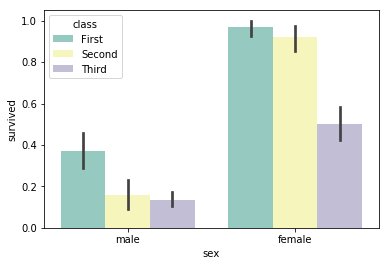

In [5]:
# barplot of sex vs survived stratified by class
sns.barplot(x="sex", y = 'survived', hue = "class", palette = "Set3",data=titanic)

What do you notice about the y-axis in this plot? How can we interpret this? **`survived` is interpreted as numeric by seaborn, so it computes the average for each bar. This can be interpreted as *survival rate* for each group.**

Let's make the same plot, but this time stratified by `deck`. What kind of color palette is appropriate here?

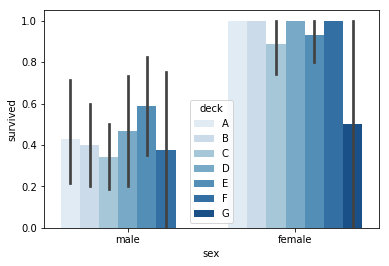

In [12]:
# barplot of sex vs survived stratified by class
sns.barplot(x="sex", y = 'survived', hue = "deck", palette = "Blues",data=titanic)

Hm, the legend is covering up some of the plot - can you find the line from Lesson 21 that we used to move the legend outsise the plot borders?

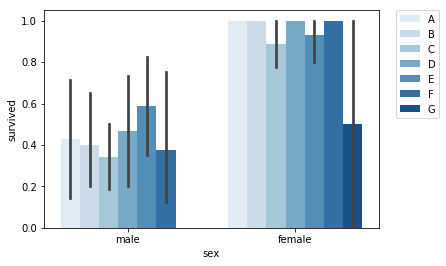

In [11]:
# barplot of sex vs survived stratified by class
sns.barplot(x="sex", y = 'survived', hue = "deck", palette = "Blues",data=titanic)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

How does our interpretation of the results change here? Because we have stratifed by more groups, there are fewer data points that fall into each bar. Beacuse of this, the survival rates and *inflated* compared to what we saw in the earlier plot, especially for the male groups. This is something you must consider when deciding how to present your data in plots.

## Count Plots

Generate a count plot to visualize the distribution the `deck` variable across all passengers in our data set. Choose a sequential color palette.

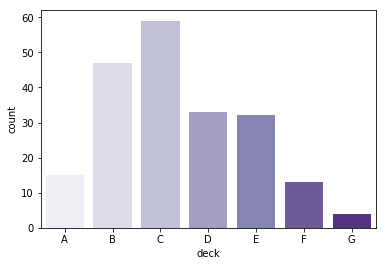

In [13]:
# count plot of deck
sns.countplot(x="deck", palette = "Purples", data=titanic)

Now stratify your plot using the `class` variable. What kind of color palette is appropriate now?

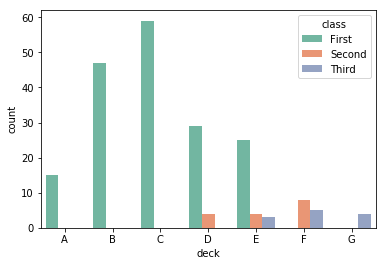

In [23]:
# count plot of deck stratified by class
sns.countplot(x="deck", hue = "class", palette = "Set2", data=titanic)

Cool! Now we can see that deck E is the only deck that housed all three classes of passengers. 

## Boxplots +

Generate a boxplot of fares across sexes.

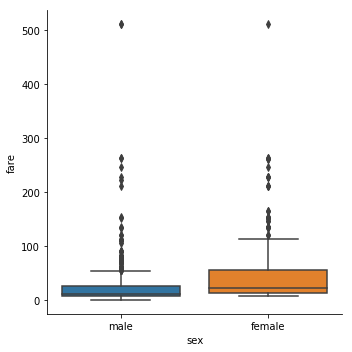

In [15]:
# boxplot of fare across sex
sns.catplot(x = "sex", y="fare", kind="box", data=titanic)

Based on this plot it looks like there are some outliers that are really smushing the bulk of our data towards the bottom of the plot, making it difficult to interpret. Let's try to remove these outliers by subsetting our `titanic` pandas DataFrame. Create a new DataFrame `titanic_subset` that contains only the rows where `fare` < 200 and generate the same plot for `titanic_subset`.

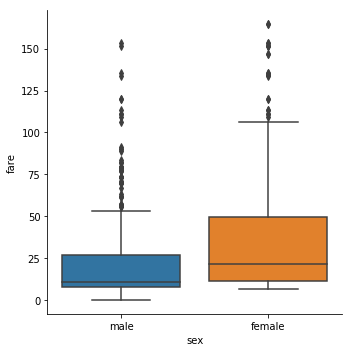

In [18]:
# subset where fare < 200
titanic_subset = titanic.query("fare < 200")
# boxplot of fare across sex for subset
sns.catplot(x = "sex", y="fare", kind="box", data=titanic_subset)

That looks much better, though there are still several high-fare outliers. We will just keep this in mind as we interpret our further analyses. 

Let's generate the same boxplot, but this time stratified by `survived`.

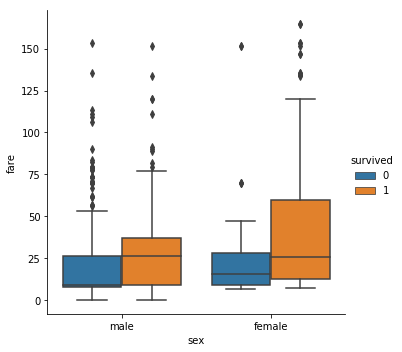

In [24]:
# boxplot of fare across sex stratified by survived for subset
sns.catplot(x = "sex", y="fare", hue = "survived", kind="box", data=titanic_subset)

Now, let's try to look at the distribution more granularly using our boxplot variations we learned.

Generate the same plot as a boxen plot:

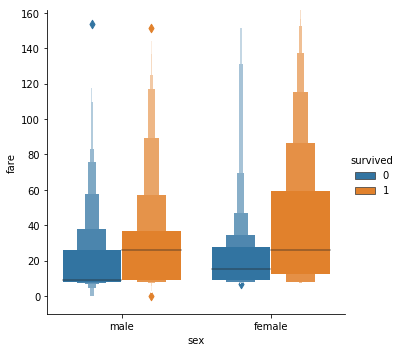

In [20]:
# boxen plot of fare across sex stratified by survived for subset
sns.catplot(x = "sex", y="fare", hue = "survived", kind="boxen", data=titanic_subset)

Now generate the same plot as a violin plot. Use the `split = True` parameter setting to make your comparisons between the `survived` groups easier.

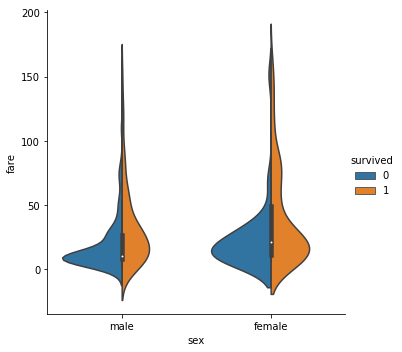

In [25]:
# violin plot of fare across sex stratified by survived for subset
sns.catplot(x = "sex", y="fare", hue = "survived", kind="violin", split = True, data=titanic_subset)

Which plot do you think is most informative in this case: boxplot, boxen plot or split violin plot?

Based on that plot, what is your interpretation about the relationship between fare, gender and survival on the Titanic?